In [1]:
import hierarchy as hrcy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
capacities = [4, 2, 1]
r = 1.1
lmbda = [2, 3]
mu = [[0.2, 0.1], [1.2, 1.1], [1.5, 1.7]]

In [3]:
number_of_states = hrcy.states.enumerate_states(capacities=capacities)
number_of_states

45

In [4]:
states = tuple(hrcy.states.get_states(capacities=capacities))
states

(((0, 4), (0, 2), (1, 0)),
 ((0, 4), (1, 1), (1, 0)),
 ((0, 4), (2, 0), (1, 0)),
 ((0, 4), (0, 1), (1, 0)),
 ((0, 4), (1, 0), (1, 0)),
 ((1, 3), (0, 2), (1, 0)),
 ((1, 3), (1, 1), (1, 0)),
 ((1, 3), (2, 0), (1, 0)),
 ((1, 3), (0, 1), (1, 0)),
 ((1, 3), (1, 0), (1, 0)),
 ((2, 2), (0, 2), (1, 0)),
 ((2, 2), (1, 1), (1, 0)),
 ((2, 2), (2, 0), (1, 0)),
 ((2, 2), (0, 1), (1, 0)),
 ((2, 2), (1, 0), (1, 0)),
 ((3, 1), (0, 2), (1, 0)),
 ((3, 1), (1, 1), (1, 0)),
 ((3, 1), (2, 0), (1, 0)),
 ((3, 1), (0, 1), (1, 0)),
 ((3, 1), (1, 0), (1, 0)),
 ((4, 0), (0, 2), (1, 0)),
 ((4, 0), (1, 1), (1, 0)),
 ((4, 0), (2, 0), (1, 0)),
 ((4, 0), (0, 1), (1, 0)),
 ((4, 0), (1, 0), (1, 0)),
 ((0, 3), (0, 2), (1, 0)),
 ((0, 3), (1, 1), (1, 0)),
 ((0, 3), (2, 0), (1, 0)),
 ((0, 3), (0, 1), (1, 0)),
 ((0, 3), (1, 0), (1, 0)),
 ((1, 2), (0, 2), (1, 0)),
 ((1, 2), (1, 1), (1, 0)),
 ((1, 2), (2, 0), (1, 0)),
 ((1, 2), (0, 1), (1, 0)),
 ((1, 2), (1, 0), (1, 0)),
 ((2, 1), (0, 2), (1, 0)),
 ((2, 1), (1, 1), (1, 0)),
 

Compute linear algebraically:

In [5]:
stationary_vector = hrcy.get_stationary_distribution(
    capacities=capacities,
    r=r,
    lmbda=lmbda,
    mu=mu,
)

In [6]:
stationary_vector

array([ 0.07440609-0.j,  0.03597606-0.j,  0.0213457 -0.j,  0.1136527 -0.j,
        0.0651885 -0.j,  0.08176799-0.j,  0.04185388-0.j,  0.02413628-0.j,
        0.06674735-0.j,  0.03571562-0.j,  0.04992483-0.j,  0.02512033-0.j,
        0.01523141-0.j,  0.04050558-0.j,  0.02186193-0.j,  0.02943374-0.j,
        0.01569733-0.j,  0.00946051-0.j,  0.02438758-0.j,  0.01362842-0.j,
        0.00976056-0.j,  0.00534737-0.j,  0.00325151-0.j,  0.01715347-0.j,
        0.00889447-0.j,  0.02976243-0.j,  0.02878085-0.j,  0.0092498 -0.j,
       -0.        -0.j, -0.        -0.j,  0.01831677-0.j,  0.01708613-0.j,
        0.00590161-0.j, -0.        -0.j, -0.        -0.j,  0.01108707-0.j,
        0.0103802 -0.j,  0.0036813 -0.j, -0.        -0.j, -0.        -0.j,
        0.00634436-0.j,  0.00668422-0.j,  0.00227605-0.j, -0.        -0.j,
       -0.        -0.j])

/home/nightwing/anaconda3/envs/hrcy/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


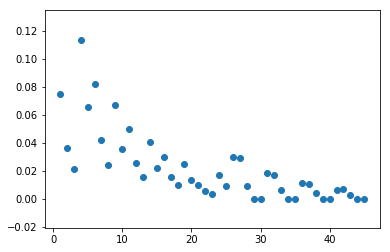

In [7]:
plt.scatter(range(1, number_of_states + 1), stationary_vector)

In [8]:
states[np.argmax(stationary_vector)]

((0, 4), (0, 1), (1, 0))

Obtain stationary vector using simulation.

In [9]:
state_in = np.array([[3, 1], [1, 0], [0, 1]])
potential_states = hrcy.transitions.get_potential_states(state_in=state_in, capacities=capacities)
potential_states

[array([[2., 1.],
        [2., 0.],
        [0., 1.]]), array([[3., 0.],
        [1., 1.],
        [0., 1.]])]

In [10]:
import collections

number_of_repetitions = 100
max_transitions = 1000

all_history = []

for seed in range(number_of_repetitions):
    output = list(
        hrcy.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
    history, dates = map(list, zip(*output))
    all_history += list(map(lambda array: tuple(map(tuple, array.astype(int))), history))
    
history_count = collections.Counter(all_history)
total = np.sum([v for v in history_count.values()])
simulated_stationary_vector = np.array([history_count.get(state, 0) / (number_of_repetitions * max_transitions) 
                                        for state in states])
total

100000

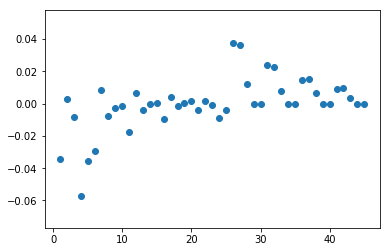

In [11]:
plt.scatter(range(1, number_of_states + 1), simulated_stationary_vector - stationary_vector)

In [12]:
states[np.argmax(simulated_stationary_vector)]

((0, 3), (0, 2), (1, 0))

# Simple example

In [30]:
capacities = [1, 1]
mu = [[1, 1], [10, 10]]
lmbda = [1, 1]
r = 1

In [31]:
num_of_states = hrcy.states.enumerate_states(capacities=capacities)

In [32]:
num_of_states

3

In [33]:
states = list(hrcy.states.get_states(capacities=capacities))
states

[((0, 1), (1, 0)), ((1, 0), (1, 0)), ((0, 0), (1, 0))]

In [34]:
matrix = hrcy.transitions.get_transition_matrix(capacities=capacities,
                                                lmbda=lmbda, 
                                                mu=mu,
                                                r=r)

In [35]:
matrix

array([[-1.,  0.,  1.],
       [ 0., -1.,  1.],
       [ 1.,  1., -2.]])

In [36]:
stationary = hrcy.get_stationary_distribution(capacities=capacities,
                                                lmbda=lmbda, 
                                                mu=mu,
                                                r=r)

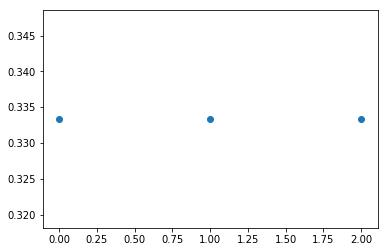

In [37]:
plt.scatter(range(num_of_states), stationary)

In [38]:
stationary

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
states

[((0, 1), (1, 0)), ((1, 0), (1, 0)), ((0, 0), (1, 0))]

In [40]:
stationary @ matrix

array([ 5.55111512e-17,  1.11022302e-16, -2.22044605e-16])

In [41]:
np.roll(stationary, 1) @ matrix

array([-1.11022302e-16, -5.55111512e-17,  2.22044605e-16])

In [61]:
number_of_repetitions = 100
max_transitions = 1000

all_history = collections.Counter()

for seed in range(number_of_repetitions):
    output = list(
        hrcy.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
    history, dates = map(list, zip(*output))
    for state, time in zip(history, np.diff(dates)):
        all_history[tuple(map(tuple, state.astype(int)))] += time
    
total = np.sum([v for v in all_history.values()])
simulated_stationary_vector = np.array([all_history.get(state, 0) / (total) 
                                        for state in states])
total

74844.94263211096

In [62]:
simulated_stationary_vector

array([0.33445666, 0.33297112, 0.33257221])

In [63]:
np.diff(dates).shape

(999,)

In [64]:
len(dates)

1000

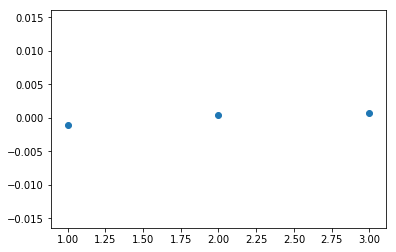

In [65]:
plt.scatter(range(1, num_of_states + 1), stationary - simulated_stationary_vector);

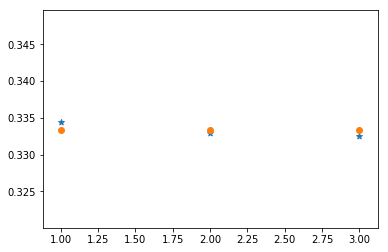

In [66]:
plt.scatter(range(1, num_of_states + 1), simulated_stationary_vector, marker='*');
plt.scatter(range(1, num_of_states + 1), stationary);

In [67]:
stationary @ matrix

array([ 5.55111512e-17,  1.11022302e-16, -2.22044605e-16])

In [46]:
simulated_stationary_vector @ matrix

array([ 0.24917,  0.25083, -0.5    ])

## Another example

In [70]:
capacities = [1, 1]
mu = [[1, 1.4], [1, 1]]
lmbda = [1.2, 1]
r = 1.1

In [71]:
stationary = hrcy.get_stationary_distribution(capacities=capacities,
                                                lmbda=lmbda, 
                                                mu=mu,
                                                r=r)

In [72]:
number_of_repetitions = 100
max_transitions = 1000

all_history = collections.Counter()

for seed in range(number_of_repetitions):
    output = list(
        hrcy.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
    history, dates = map(list, zip(*output))
    for state, time in zip(history, np.diff(dates)):
        all_history[tuple(map(tuple, state.astype(int)))] += time
    
total = np.sum([v for v in all_history.values()])
simulated_stationary_vector = np.array([all_history.get(state, 0) / (total) 
                                        for state in states])

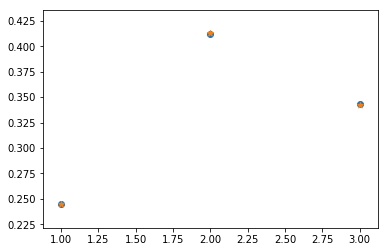

In [81]:
plt.scatter(range(1, num_of_states + 1), stationary);
plt.scatter(range(1, num_of_states + 1), simulated_stationary_vector, marker='*');

## Another another example 

In [82]:
capacities = [2, 2, 1]
mu = [[1, 1.4], [1, 1], [1, 1]]
lmbda = [1.2, 1]
r = 1.1

In [88]:
number_of_states = hrcy.states.enumerate_states(capacities=capacities)

In [92]:
number_of_states

25

In [84]:
stationary = hrcy.get_stationary_distribution(capacities=capacities,
                                                lmbda=lmbda, 
                                                mu=mu,
                                                r=r)

In [93]:
states = hrcy.states.get_states(capacities)

In [95]:
number_of_repetitions = 100
max_transitions = 1000

all_history = collections.Counter()

for seed in range(number_of_repetitions):
    output = list(
        hrcy.get_simulated_history(
            capacities=capacities,
            r=r,
            lmbda=lmbda,
            mu=mu,
            max_transitions=max_transitions,
            seed=seed,
        )
    )
    history, dates = map(list, zip(*output))
    for state, time in zip(history, np.diff(dates)):
        all_history[tuple(map(tuple, state.astype(int)))] += time
    
total = np.sum([v for v in all_history.values()])
simulated_stationary_vector = np.array([all_history.get(state, 0) / (total) 
                                        for state in states])

/home/nightwing/anaconda3/envs/hrcy/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


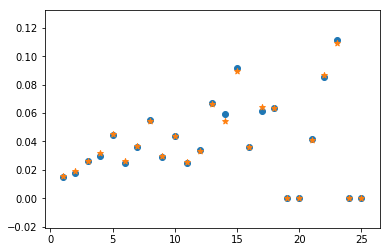

In [96]:
plt.scatter(range(1, number_of_states + 1), stationary);
plt.scatter(range(1, number_of_states + 1), simulated_stationary_vector, marker='*');